# Premières visualisations simples :

Dans cette section, nous allons nous intéresser aux **premières visualisations simples** qu'il est possible de réaliser à l'aide de différentes bibliothèques disponibles sous Python.

Nous allons travailler avec un set de données disponible sur le site Kaggle:
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

Brève description des colonnes:
* fixed acidity : most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
* volatile acidity : the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
* citric acid : found in small quantities, citric acid can add 'freshness' and flavor to wines
* residual sugar : the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
* chlorides : the amount of salt in the wine
* free sulfur dioxide : the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and * bisulfite ion; it prevents microbial growth and the oxidation of wine
* total sulfur dioxide : amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
* density : the density of water is close to that of water depending on the percent alcohol and sugar content
* pH : describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
* sulphates : a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
* alcohol : amount of alcohol present
* quality : median value of estimated qualities, range from 0 (very poor) to 10 (excellent)

> Consigne :
> * Procédons d'abord aux imports "classiques" qui nous permettent de travailler avec les df.
>
>
> ```python
> import numpy as np              # linear algebra
import pandas as pd             # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', False)
import os                       # files handling
import matplotlib.pyplot as plt # plotting & dataviz
import re
from random import randint, seed
from IPython.display import display
>
> %matplotlib inline
> ```

In [1]:
import numpy as np              # linear algebra
import pandas as pd             # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', False)
import os                       # files handling
import matplotlib.pyplot as plt # plotting & dataviz
import re
from random import randint, seed
from IPython.display import display

%matplotlib inline


## Nous pouvons à nouveau vérifier ce qui se trouve dans notre dossier de travail

Pour cela, nous puvons à nouveau utiliser la bibliothèque ```os```.

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'TP-TD_EDA_CNAM_vide_2022.ipynb',
 'TP-TD_visualisation_simples_CNAM_vide_2022.ipynb',
 'Transactions_EDA_CNAM.csv',
 'winequality_red2_EDA_CNAM.csv']

## Commençons par importer les fichiers de travail

> Consignes :
> 1. Nous travaillons sur le fichier CSV nommé : ```"winequality_red2_EDA_CNAM.csv"```.
> 2. Nous travaillerons également sur le même fichier que précédemment ```Transactions_EDA_CNAM.csv```.
> * Importons les fichiers dans des dataframe nommées ```dfWine``` et ```transactions```.
> * Afficher les 10 premières lignes de ```dfWine```.

In [3]:
transactions = pd.read_csv("Transactions_EDA_CNAM.csv", sep = ",", header = 0, index_col = 0)

dfWine = pd.read_csv("winequality_red2_EDA_CNAM.csv", sep = ",", header = 0)

dfWine.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  ...  density    pH  sulphates  alcohol  quality
0            7.4              0.70         0.00             1.9      0.076  ...   0.9978  3.51       0.56      9.4        5
1            7.8              0.88         0.00             2.6      0.098  ...   0.9968  3.20       0.68      9.8        5
2            7.8              0.76         0.04             2.3      0.092  ...   0.9970  3.26       0.65      9.8        5
3           11.2              0.28         0.56             1.9      0.075  ...   0.9980  3.16       0.58      9.8        6
4            7.4              0.70         0.00             1.9      0.076  ...   0.9978  3.51       0.56      9.4        5
5            7.4              0.66         0.00             1.8      0.075  ...   0.9978  3.51       0.56      9.4        5
6            7.9              0.60         0.06             1.6      0.069  ...   0.9964  3.30       0.46      9.4        5
7            7.3              0.65         0.00             1.2      0.065  ...   0.9946  3.39       0.47     10.0        7
8            7.8              0.58         0.02             2.0      0.073  ...   0.9968  3.36       0.57      9.5        7
9            7.5              0.50         0.36             6.1      0.071  ...   0.9978  3.35       0.80     10.5        5

[10 rows x 12 columns]

# Première exploration et nettoyage

Ces premières étapes, abordées précédemment demeurent incontournables et doivent systématiquement être réalisées.

Elle peuvent parfois être minimisées, dans le cas par exemple où nous nous serions occupés préalablement de vérifier la qualité et la disponibilité des données lors de l'ETL.

Comme nous avons déjà fait un travail préalable sur transactions, nous allons nous concentrer sur dfWine.

> Consignes :
> * A l'aide de la fonction récapitulative créée précédemment que vous pouvez réutiliser, proposer une brève description des données.
> * Porposez également une brève description "mathématique" des données.

In [4]:

def desc_df(df) :
    print("Format de la base : {}".format(df.shape))
    index = df.columns

    cols = ["type","nb_nan","nb_unique","v1","v2","v3"]

    df_base = []

    for i in index :
        x = df[i]

        df_base.append([x.dtypes,x.isna().sum(),x.nunique(),x.iloc[0], x.iloc[1], x.iloc[2]])

    df_return = pd.DataFrame(df_base, columns=cols, index = index)
    
    return(df_return)

transactions['tran_date'] = transactions['tran_date'].replace(r'/', '-', regex=True)

print("Transactions : ")

display(desc_df(transactions))

display(transactions.describe(include = 'all'))

print("\nVins : ")

display(desc_df(dfWine))

display(dfWine.describe(include = 'all'))

Transactions : 
Format de la base : (23053, 9)


type  nb_nan  nb_unique          v1          v2          v3
cust_id             int64       0       5506      270351      270384      273420
tran_date          object       0       1129  28-02-2014  27-02-2014  24-02-2014
prod_subcat_code    int64       0         12           1           5           6
prod_cat_code       int64       0          6           1           3           5
Qty                 int64       0         10          -5          -5          -2
Rate                int64       0       2551        -772       -1497        -791
Tax               float64       0       4194       405.3     785.925      166.11
total_amt         float64       0       5764     -4265.3   -8270.925    -1748.11
Store_type         object       0          4      e-Shop      e-Shop    TeleShop

cust_id   tran_date  prod_subcat_code  prod_cat_code  ...          Rate           Tax     total_amt  Store_type
count    23053.000000       23053      23053.000000   23053.000000  ...  23053.000000  23053.000000  23053.000000       23053
unique            NaN        1129               NaN            NaN  ...           NaN           NaN           NaN           4
top               NaN  13-07-2011               NaN            NaN  ...           NaN           NaN           NaN      e-Shop
freq              NaN          35               NaN            NaN  ...           NaN           NaN           NaN        9311
mean    271021.746497         NaN          6.149091       3.763632  ...    636.369713    248.667192   2107.308002         NaN
std       2431.692059         NaN          3.726372       1.677016  ...    622.363498    187.177773   2507.561264         NaN
min     266783.000000         NaN          1.000000       1.000000  ...  -1499.000000      7.350000  -8270.925000         NaN
25%     268935.000000         NaN          3.000000       2.000000  ...    312.000000     98.280000    762.450000         NaN
50%     270980.000000         NaN          5.000000       4.000000  ...    710.000000    199.080000   1754.740000         NaN
75%     273114.000000         NaN         10.000000       5.000000  ...   1109.000000    365.715000   3569.150000         NaN
max     275265.000000         NaN         12.000000       6.000000  ...   1500.000000    787.500000   8287.500000         NaN

[11 rows x 9 columns]


Vins : 
Format de la base : (1599, 12)


type  nb_nan  nb_unique       v1       v2      v3
fixed acidity         float64       0         96   7.4000   7.8000   7.800
volatile acidity      float64       0        143   0.7000   0.8800   0.760
citric acid           float64       0         80   0.0000   0.0000   0.040
residual sugar        float64       0         91   1.9000   2.6000   2.300
chlorides             float64       0        153   0.0760   0.0980   0.092
free sulfur dioxide   float64       0         60  11.0000  25.0000  15.000
total sulfur dioxide  float64       0        144  34.0000  67.0000  54.000
density               float64       0        436   0.9978   0.9968   0.997
pH                    float64       0         89   3.5100   3.2000   3.260
sulphates             float64       0         96   0.5600   0.6800   0.650
alcohol               float64       0         65   9.4000   9.8000   9.800
quality                 int64       0          6   5.0000   5.0000   5.000

fixed acidity  volatile acidity  citric acid  residual sugar  ...           pH    sulphates      alcohol      quality
count    1599.000000       1599.000000  1599.000000     1599.000000  ...  1599.000000  1599.000000  1599.000000  1599.000000
mean        8.319637          0.527821     0.270976        2.538806  ...     3.311113     0.658149    10.422983     5.636023
std         1.741096          0.179060     0.194801        1.409928  ...     0.154386     0.169507     1.065668     0.807569
min         4.600000          0.120000     0.000000        0.900000  ...     2.740000     0.330000     8.400000     3.000000
25%         7.100000          0.390000     0.090000        1.900000  ...     3.210000     0.550000     9.500000     5.000000
50%         7.900000          0.520000     0.260000        2.200000  ...     3.310000     0.620000    10.200000     6.000000
75%         9.200000          0.640000     0.420000        2.600000  ...     3.400000     0.730000    11.100000     6.000000
max        15.900000          1.580000     1.000000       15.500000  ...     4.010000     2.000000    14.900000     8.000000

[8 rows x 12 columns]

### Etat des lieux

* Nous pouvons constater ici que :
    * Le nombre d'entrées est très limité (seulement 1599 lignes)
    * Nous avons de la chance : il n'y a pas de valeurs manquantes (Nan)
    * Les variables sont des nombres décimaux
    * La description de dfWine montre aussi qu'il n'y a à priori pas d'outliers

A priori il n'y a donc pas de modifications importantes à réaliser avant de commencer à travailler.

# <font color='orange'>Fin partie</font>

## Première visualisation :

Pour commencer, nous utiliserons la bibliothèque Matplotlib, largement utilisée dans le cadre de la datavisualisation.

Les visualisations diponibles sont très diversifiées. Il est possible de tracer des courbes, des nuages de points, des histogrammes, des "camemberts", des heatmaps...........

### Les courbes "simples"

La méthode ```plot()``` du package matplotplib permet de tracer une courbe simple de x en fonction de y.
Les arguments et la manière de modifier l'apparence des graphes sont très divers et variés. Nous en aborderons différentes au cours de ces exercices.

> Consignes :
> * Commençons tout de suite avec une première courbe à partir de "transactions" : afficher dans un graphique de dimension (12,8)
> * Modifier l'orientation des labels de l'axe des abscisse (angle de 60°).

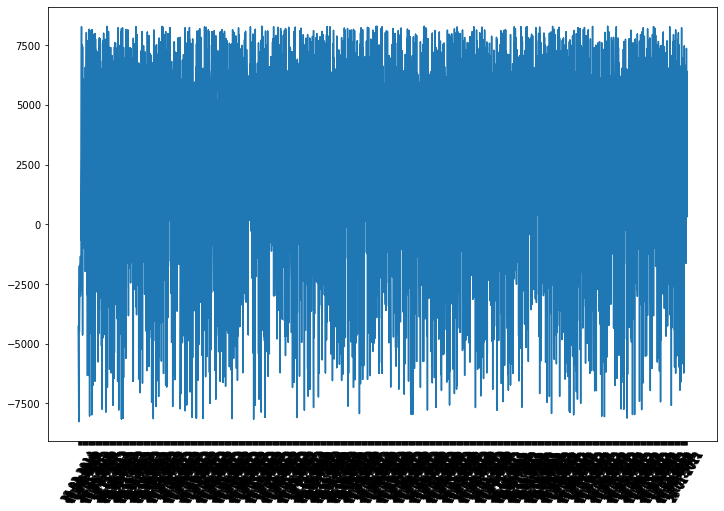

In [5]:
plt.figure(figsize=(12,8));

plt.plot(transactions["tran_date"],transactions["total_amt"]);

plt.xticks(rotation=60);

Il n'est pas possible de constater quoi que ce soit sur ce graphique qui est beaucoup trop chargé.

> Consignes :
> * Créer une seconde dataframe nommée ```trans2``` qui ne contient que les **800** premières lignes de ```transactions```.
> * Créer une nouvelle colonne 'mean1' dans ```trans2``` qui correspond à la moyenne de ```'total_amt'```.
> * Tracer la courbe représentant ```'total_amt'``` en fonction de la date de transaction.
> * Tracer la courbe représentant la moyenne de ```'total_amt'``` en fonction de la date de transaction.
> * Modifier l'orientation des labels de l'axe des abscisse (angle de 60°).

<ipython-input-6-9f7575b9090c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans2["mean1"] = trans2["total_amt"].mean()


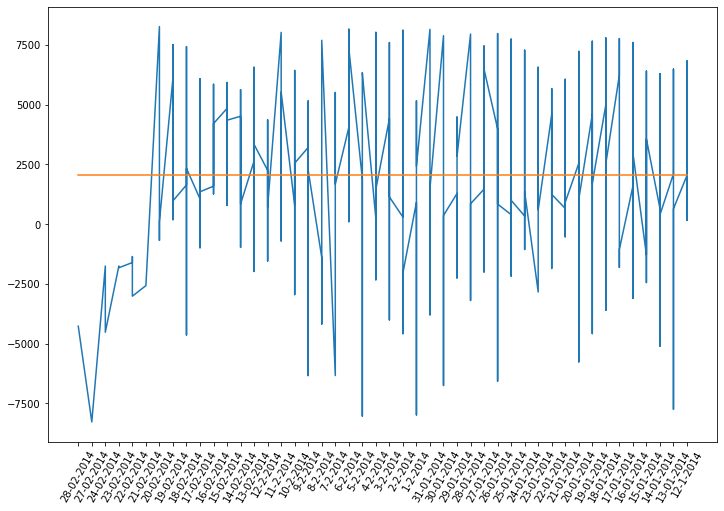

In [6]:
trans2 = transactions.head(800)

trans2["mean1"] = trans2["total_amt"].mean()

plt.figure(figsize=(12,8));

plt.plot(trans2["tran_date"],trans2["total_amt"]);

plt.plot(trans2["tran_date"],trans2["mean1"]);

plt.xticks(rotation=60);

Pour superposer plusieurs courbes sur le même graphique, on peut cumuler les instructions plot les unes après les autres, comme ceci :
```python
plt.plot(x,y)
plt.plot(u,v)
plt.plot(w,z)
```
ou simplement utiliser la syntaxe suivante:
```python
plt.plot(x,y,u,v,w,z)
```

En fonction de ce que vous avez réalisé ci-dessus, essayez d'implémenter la manière alternative

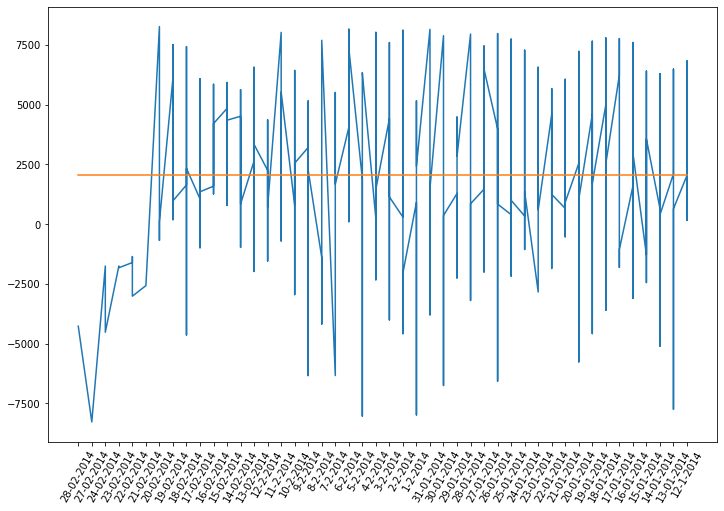

In [7]:
plt.figure(figsize=(12,8));
plt.plot(trans2["tran_date"],trans2["total_amt"],trans2["tran_date"],trans2["mean1"]);
plt.xticks(rotation=60);

# Représentations alternatives:

Il est possible de constater que la représentation en courbe (```.plot()```) n'est pas idéale ici.
Peut-être que nous pourrions essayer une alternative: le graphique en bar.

>Consignes : 
>* A partir de la df ```trans2``` et à l'aide de la méthode ```.bar()```, créer un graphique de taille 12,8.
>* Orientez les légendes de l'axe des abscisses à 60°
>* Que remarquez vous ?

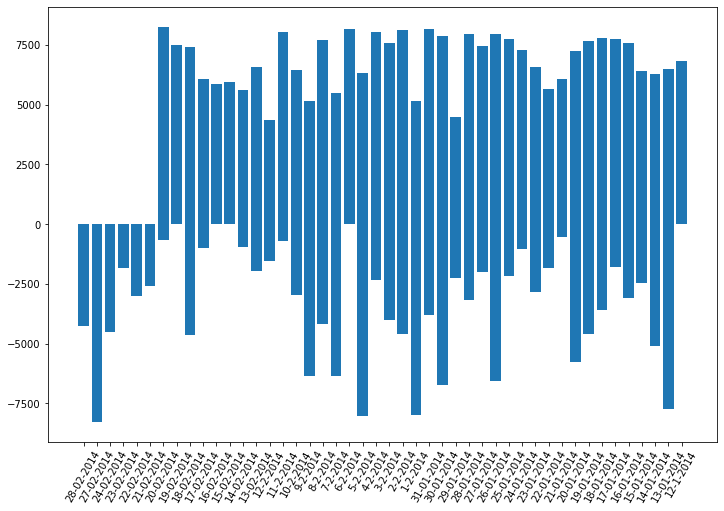

In [8]:
plt.figure(figsize=(12,8));

plt.bar(trans2["tran_date"],trans2["total_amt"]);

plt.xticks(rotation=60);

# <font color='orange'>Fin partie</font>

# La dataviz en support de l'EDA

On peut remarquer au premier coup d'oeil (Comme dans le notebook précédent) que certaines transactions ont des valeurs négatives.

Il serait donc intéressant d'enlever les valeurs de ```'total_amt'``` inférieures à 0.

Afin de potentialiser la comparaison entre deux visualisation, on peut souhaiter superposer des graphiques par le biais de la fonction ```.subplot()```. Cette fonction prend en arguments le nombre de lignes, le nombre de colones et la position du graph. Par exemple, pour créer 6 graphs superposé : 3 lignes sur 2 colones il faudra indiquer ```.subplot(3,2,X)``` ou ```.subplot(32X)```. Le **X** correspond alors à la position du graphique (X=1 en haut à gauche.....). Ceci est très pratique dans le cas où nous souhaitons créer des graphs successivement dans une boucle ```for```.

> Consigne :
> * Créez une nouvelle df ```trans3``` correspondant aux transactions de ```trans2``` dont le montant (```'total_amt'```) est **supérieur** à 0.
> * Afficher dans un premier graph la courbe de la somme des transactions en fonction de la date de transaction. Utilisez la fonction ```.subplot()```.
> * Dans un second graph (en dessous du premier), présentez la même variable mais avec un graph en **bar** (en bleu). Ajoutez également la **moyenne** (en orange) et la **médianne** (en vert) de la somme des transactions.
> * Que remarquez vous concernant la moyenne et la médianne ?
> 
> Pour les couleurs, vous pouvez vous appuyer sur :
> https://matplotlib.org/stable/gallery/color/named_colors.html




<ipython-input-9-afa0df24d914>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans3["mean2"] = trans3["total_amt"].mean()
<ipython-input-9-afa0df24d914>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans3["median2"] = trans3["total_amt"].median()


"\nplt.subplot(211)\nplt.plot(trans3['tran_date'],trans3['total_amt'],trans3['tran_date'],trans3['mean1'])\nplt.xticks(rotation=60);\n\nplt.subplot(212)\nplt.bar(trans3.tran_date,trans3.total_amt,width=0.6,color='cornflowerblue')\nplt.plot(trans3['tran_date'],trans3['mean2'], color='orange',linewidth=4,label=labelmean)\nplt.plot(trans3['tran_date'],trans3['median2'],color='lime',linewidth=4,label=labelmedian)\nplt.legend()\nplt.xticks(rotation=60);\n"

<Figure size 864x864 with 0 Axes>

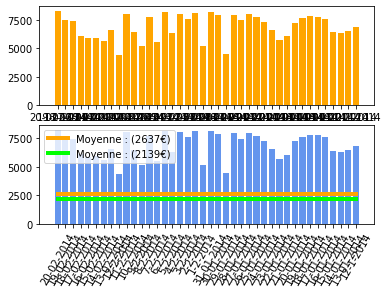

In [9]:
trans3 = trans2[trans2["total_amt"] > 0]

trans3["mean2"] = trans3["total_amt"].mean()
trans3["median2"] = trans3["total_amt"].median()

s1 = str(round(trans3["mean2"].iloc[0]))
s2 = str(round(trans3["median2"].iloc[0]))

labelmean = str("Moyenne : (" + s1 + "€)")
labelmedian = str("Moyenne : (" + s2 + "€)")

plt.figure(figsize=(12,12));

fig, ax = plt.subplots(2);

ax[0].bar(trans3["tran_date"],trans3["total_amt"],color = "orange");

ax[1].bar(trans3["tran_date"],trans3["total_amt"],color = "cornflowerblue");
ax[1].plot(trans3["tran_date"],trans3["mean2"],color = "orange", linewidth = 4, label = labelmean);
ax[1].plot(trans3["tran_date"],trans3["median2"],color = "lime", linewidth = 4, label = labelmedian)

plt.legend();
plt.xticks(rotation=60);

"""
plt.subplot(211)
plt.plot(trans3['tran_date'],trans3['total_amt'],trans3['tran_date'],trans3['mean1'])
plt.xticks(rotation=60);

plt.subplot(212)
plt.bar(trans3.tran_date,trans3.total_amt,width=0.6,color='cornflowerblue')
plt.plot(trans3['tran_date'],trans3['mean2'], color='orange',linewidth=4,label=labelmean)
plt.plot(trans3['tran_date'],trans3['median2'],color='lime',linewidth=4,label=labelmedian)
plt.legend()
plt.xticks(rotation=60);
"""


# Le boxplot permet une visualisation de la distribution d'un échantillon :

Il est possible de constater que la moyenne diffère de la médianne. Cela nous donne une intuition sur la distribution des données.

En effet, en terme de distribution, les données peuvent suivre une loi normale (distribution gaussienne). Dans ce cadre, la moyenne doit être égale à la médianne. Dans le cas d'une distribution normale, il est possible d'appliquer des méthodes statistiques (paramétriques) et même simplement de comprendre la répartition de nos données.

La description de données qui ne suivraient pas une loi normales doit se faire différemment (description par médianne, tests statistiques non paramétriques --> basés plutot sur le rang et l'ordonation que sur la moyenne)...

Ici, la moyenne et la médianne semblent différentes. On peut donc suspecter que la distribution des données ne suit pas une loi normale. Afin d'aller un peu plus loin dans cette intuition, il est possible de recourir aux boxplot (```.boxplot()```).

> Consigne:
> * A partir de ```trans3```, construire un box plot décrivant la distribution des données de la somme des transaction.

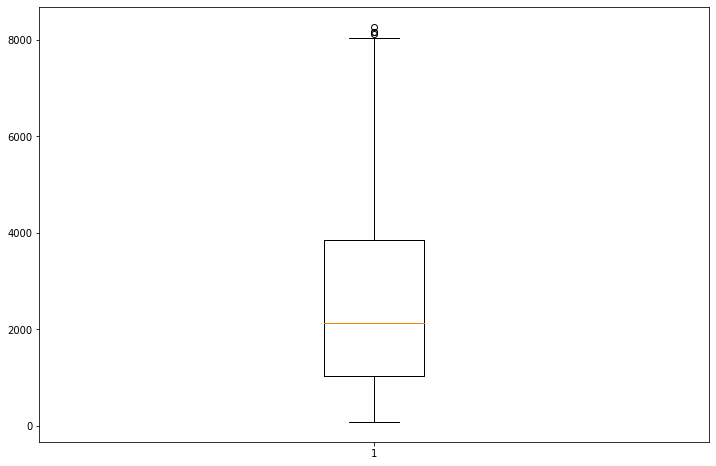

In [10]:
plt.figure(figsize=(12,8));

plt.boxplot(trans3["total_amt"]);

# Boxplot par le biais de pandas

Tout comme la fonction ```.plot()```, le package pandas possède également directement une fonction qui permet de réaliser des boxplot.

> Consigne:
> * En utilisation la fonction ```.boxplot()``` du package pandas, créer une **représentation boxplot** de la somme des transaction par jour de transaction. Vous prêterez attention à la taille de la figure et au visuel des légendes de l'axe des abscisses.

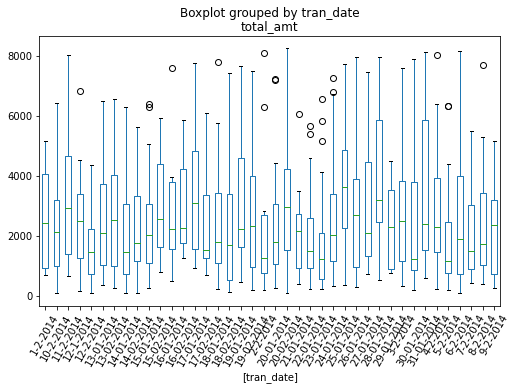

In [11]:
trans3.boxplot(column=["total_amt"],by = ["tran_date"], figsize=(8,5), rot=60,grid=False);

# Graphs imbriqués :

Sur matplotlib, il est également possible d'insérer un graphe à l'intérieur d'un autre, grâce à la fonction ```.axes()```.


Il suffit de lui donner en argument une liste contenant les positions x et y du point en bas à gauche du graphe à insérer, (valeurs entre 0 et 1, indépendamment des axes choisis) , ainsi que les dimensions de ce dernier (largeur et hauteur, entre 0 et 1).


Pour plus de visibilité, il est recommandé de donner à cet axe un fond de couleur différente, grâce à l'ajout de l'argument facecolor. Par exemple, plt.axes([0.3, 0.7, 0.3, 0.3], facecolor='green') crée un graphique avec fond vert et dont le point en bas à gauche se situe en abscisse à 30% du graphique actuel , en ordonnée à 70% de hauteur, et dont la largeur et la hauteur représentent 30% de celles du graphique actuel.

Dans un souci d'esthétisme, il est préférable de supprimer les graduations des axes des graphiques insérés dans d'autres. Les commandes ```plt.xticks([])``` et ```plt.yticks([])``` suffisent à supprimer respectivement les axes x et y.


> Consignes :
> * Créer une figure de taille (10,10), contenant le ```.boxplot()``` associé à la somme totale des transactions
> * Créer un second graphique, **au sein du premier**, à la position (0.62, 0.65) et de taille (0.25, 0.20) avec un fond de code couleur ```#ffe5c1```.
> * Dans ce second graphique, tracez l'histogramme **de la même variable** de code couleur #FFC575.
> * Supprimer les axes et donner aux abscisses le label : 'Distribution'.

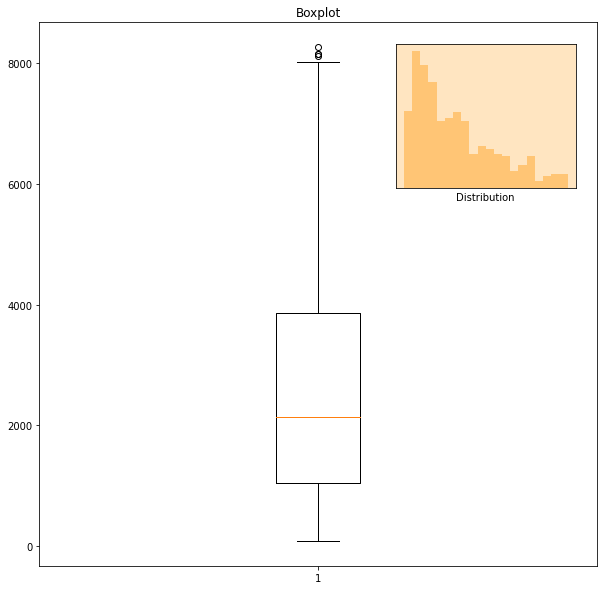

In [12]:
plt.figure(figsize=(10,10));

plt.boxplot(trans3["total_amt"]);

plt.title("Boxplot")

ax = plt.axes([0.62,0.65,0.25,0.2],facecolor='#ffe5c1');

ax.hist(trans3["total_amt"],bins = 20, color  ="#FFC575");

plt.xticks([]);
plt.yticks([]);

plt.xlabel('Distribution');


# <font color='orange'>Fin partie</font>

# Seaborn pour la data visualisation

**Seaborn** est une bibliothèque Python pour la visualisation de données, spécialisée dans l'analyse statistique. Basée sur la bibliothèque Matplotlib, elle est totalement adaptée aux data frames de Pandas. Ainsi, au delà d'une interface visuellement améliorée, Seaborn permet de produire rapidement et intuitivement des graphiques statistiques de qualité.

De plus, Seaborn utilise des thèmes par défaut esthétiquement agréable, et permet de créer facilement ses propres palettes de couleurs. Seaborn permet ainsi d'apprendre à connaître un jeu de données de manière rapide et efficace.

Il est important de considérer **Seaborn** a plus vocation à **compléter la bibliothèque Matplotlib** qu'à la remplacer. Ainsi, vu que la plupart des fonctions de la première utilise des fonctions de la seconde, certaines modifications ou personnalisations requerront l'appel à Matplotlib.

> Consigne:
> * Importer la bibliothèque ```Seaborn``` et utiliser son alias ```sns```.

In [13]:
import seaborn as sns

# Histogrammes avec seaborn

Comme nouvs venons de le voir précédemment, lors de la phase de l'EDA, étudier la distribution d'une variable est un processus important.

La bibliothèque seaborn dispose de la fonction ```.displot()``` qui permet d'évaluer rapidement la distribtion d'une variable.

Cette fonction, en plus d'afficher l'histogramme de la distribution de la variable, permet également d'afficher une estimation par noyau (méthode statistique d'etimation de la densité de probabilité d'une variable) grace à au paramètre ```kde=True```.

> Consigne
> * Créer un histogramme de la distribution de la somme totale des transactions à l'aide de la bibliothèque sns et de la fonction ```.displot()```.
> * Vous pouvez ajuster le paramètre ```bins =```, pour moduler l'apparence de votre graph
> * Ajouter une estimation par noyau de la densité de probabilité.

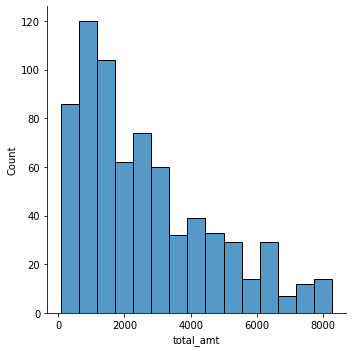

In [14]:
sns.displot(trans3["total_amt"], bins = 15)

# Subplots avec seaborn

Il est aussi possible de créer des subplot avec la bibliothèque Seaborn.

La mise en oeuvre peu différer des exemples précédemment abordés.

> Consigne :
> * En employant la fonctions ```.histplot()```, à partir de la df ```trans3```, tracez deux histogrammes cotes à cote. Il faudra rechercher la manière de le mettre en oeuvre.
> * Le premier graph **rouge** doit décrire la variable ```'prod_cat_code'```.
> * Le second graph **bleu** doit décrire la variable ```'total_amt'```.

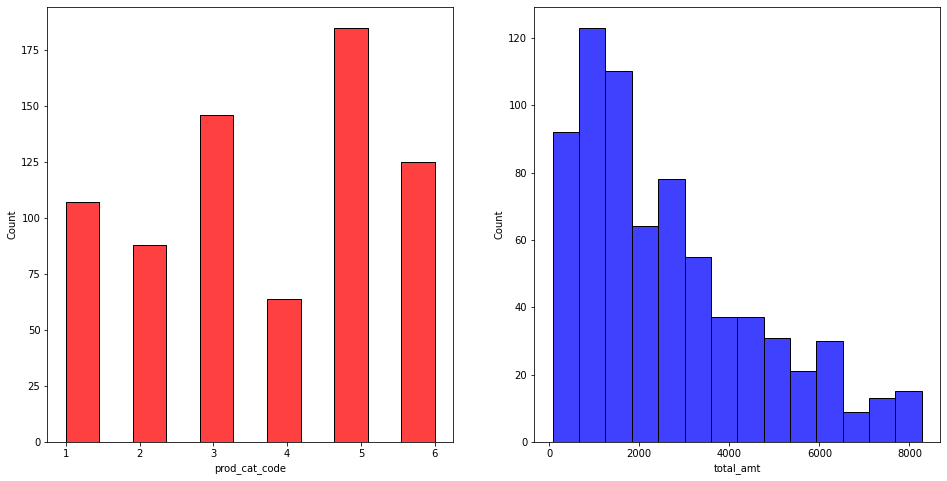

In [15]:
fig, ax = plt.subplots(1,2, figsize=(16,8));

sns.histplot(trans3["prod_cat_code"],color = "red", ax=ax[0]);

sns.histplot(trans3["total_amt"], color = "blue", ax=ax[1]);

# <font color='orange'>Fin partie</font>

# Seaborn : Variables catégorielles

Une fonction particulièrement utile dans le cadre de l'EDA, est la fonction ```.countplot()```. Elle s'utilise sur des variables catégorielles et permet de présenter le compte de la variable d'intéret.

> Consigne:
> * A partir de la df trans3, construisez un **```.countplot()```** du type de magasin. 
> 
> N'hésitez pas à consulter la documentation de seaborn (https://seaborn.pydata.org/generated/seaborn.countplot.html).
> 
> Dans une autre cellule, vous pouvez également afficher à nouveau les 5 premières lignes pour vous remémorer le nom de la variable d'intéret.

c:\users\monthieux\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


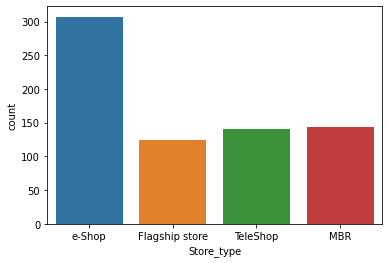

In [16]:
sns.countplot(trans3["Store_type"]);

# Analyses multivariées :

La bibliothèque **seaborn** s'avère également très pratique afin de réaliser des analyses multivariées et facilie la mise en oeuvre de telles analyses.

La fonction ```.catplot()``` permet par exemple d'afficher un nuage de point en bande (**stripplot**) d'une variable, en fonction d'une autre variable catégorielle. L'exemple facilitera la compréhension. 

Cette fonction peut prendre un argument ```'kind='``` qui modifie l'apparence : chaque bande peut s'ajuster pour que les points ne se chevauchent pas, ou être sous la forme d'une boxplot.

> Consigne:
> * A partir de la df ```trans3```, créer une visualisation à l'aide de la fonction ```.catplot()``` qui permet de visualiser la distribution de ventes en fonction du type de store.
> * Ajouter et faire varier le paramètre ```kind```, pour modifier l'apparence du graph.

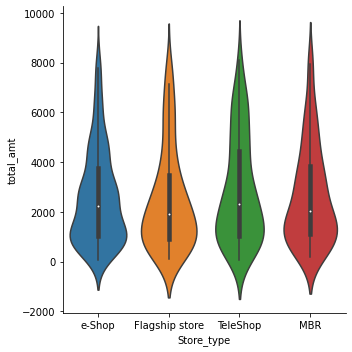

In [17]:
sns.catplot(data = trans3, x = "Store_type",y = "total_amt", kind = "violin")

# Catplot et subplots

De la même manière que précédemment, il peut être intéressant de visualiser des graphs côtes à côtes.

Le processus mis en oeuvre est le même que précédemment (bibliothèque seaborn).

Notez que la fonction ```.catplot()``` ne peut pas être directement mis dans un subplot. Ainsi, dans le cas où l'on souhaite faire un ```.catplot()``` avc le paramètre ```kind="box"```, il conviendra alors de faire un ```sns.boxplot()``` directement.

> Consigne:
> * Créer deux graphs côtes à côtes.
> * Dans le premier graph (à gauche), afficher un graph de type **box** de la somme de la transaction en fonction du type de magasin.
> * Dans le second graph (à droite), afficher un graph de type **swarm** de la somme de la transaction en fonction du code de catégorie des produits.
> 
> Vous pouvez constater que ces deux représentations permettent de rapidement visualiser les distributions en fonction de chaque catégories.

c:\users\monthieux\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\monthieux\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\monthieux\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\monthieux\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.9% of the points cannot be placed; you may want to decrease the size of the markers or use strip

<AxesSubplot:xlabel='Store_type', ylabel='total_amt'>

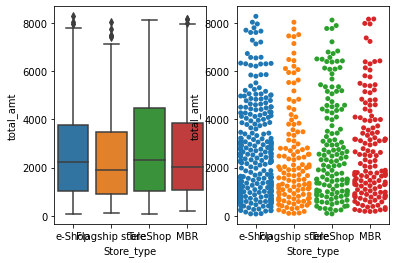

In [18]:
fig, ax = plt.subplots(1,2);

sns.boxplot(data = trans3, x = "Store_type",y = "total_amt", ax=ax[0])

sns.swarmplot(data=trans3, x = "Store_type",y = "total_amt", ax=ax[1])

# Paramètre ```'hue'```, ajout de complexité

De nombreuses représentations graphiques de la bibliothèque Seaborn acceptent le paramètre ```'hue='```. Ce paramètre permet d'ajouter une couche de complexité supplémentaire. En effet, il permet de descendre dans la subdivision et d'attribuer des couleurs en fonction d'un paramètre particulier.

> Consigne:
> * Créer un ```.catplot()``` permettant de visualiser le **total des commandes passées** en fonction du **code de la catégorie de produit**. 
> * Colorer la visualisation en fonction du **type de magasin**.
> * Essayer les paramètres ```kind='boxen'``` et ```height=8``` afin de modifier l'apparence du graph.

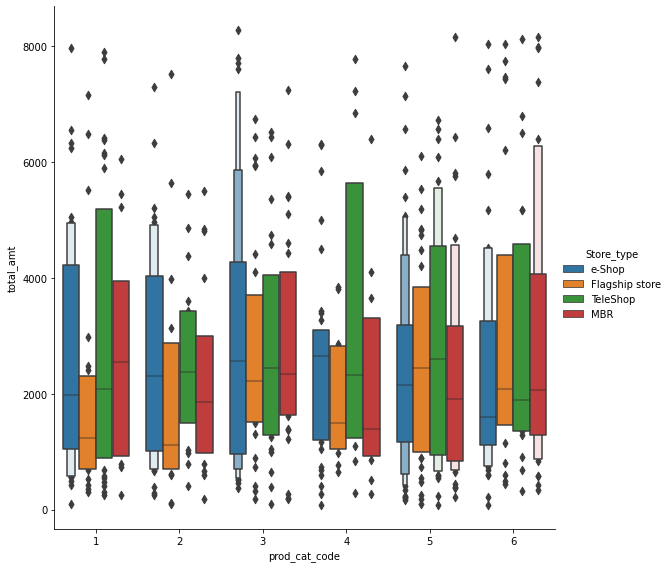

In [19]:
sns.catplot(data = trans3, x = "prod_cat_code",y = "total_amt", hue = "Store_type", kind = "boxen", height=8);

# Relplot avec seaborn

Les fonctions ```.scatterplot()``` et ```.lineplot()``` permettent d'afficher respectivement **nuages de points** et **courbes**.

Il est aussi possible d'utiliser la fonction ```.relplot()``` qui utilise l'une ou l'autre de ces fonctions,  à l'aide du paramètre ```'kind='```.

Par défaut la fonction ```.relplot()``` affiche un nuage de points. Elle prend comme arguments principaux un nom de variable dans x, un nom de variable dans y, et le nom du dataframe utilisé dans data.

> Consigne :
> * A partir de la df ```trans3```, et de la fonction ```.relplot()```, afficher en **rouge** la **courbe** du montant des taxes en fonction de la date de transaction.
> * Ajouter également le paramètre ```height=12``` pour augmenter la taille du graphe.

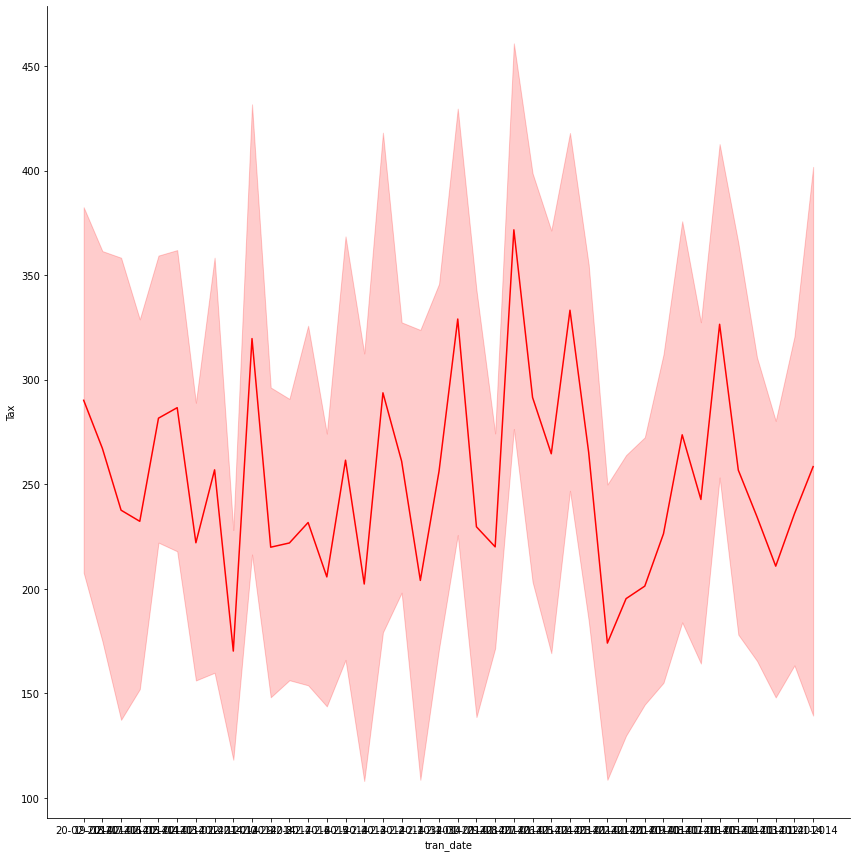

In [20]:
sns.relplot(data = trans3, x = "tran_date", y = "Tax", kind = "line", color = "r", height = 12);

# <font color='orange'>Fin partie</font>

# Revenons à la df sur la qualité des vins...

Cela fait longtemps que nous n'en n'avons pas discuté....

> Consigne:
> * Commençons par afficher à nouveau les 5 premières lignes de cette dfWine...

In [21]:
dfWine.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  ...  density    pH  sulphates  alcohol  quality
0            7.4              0.70         0.00             1.9      0.076  ...   0.9978  3.51       0.56      9.4        5
1            7.8              0.88         0.00             2.6      0.098  ...   0.9968  3.20       0.68      9.8        5
2            7.8              0.76         0.04             2.3      0.092  ...   0.9970  3.26       0.65      9.8        5
3           11.2              0.28         0.56             1.9      0.075  ...   0.9980  3.16       0.58      9.8        6
4            7.4              0.70         0.00             1.9      0.076  ...   0.9978  3.51       0.56      9.4        5

[5 rows x 12 columns]

# Intéressons nous à une variable...

Regardons un peu la variable "chlorides" et sa distribution.

> Consigne:
> * A l'aide de la bibliothèque **Seaborn**, proposer une visualisation de la distribution de la variable ```'chlorides'```.

c:\users\monthieux\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


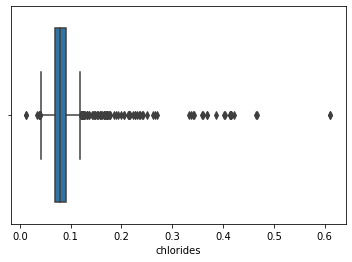

In [22]:
sns.boxplot(dfWine["chlorides"]);

# Vérifions cela avec la bibliothèque matplotlib

> Consignes :
> * Créer une figure de taille (10,10), contenant le ```.boxplot()``` associé au taux de chlore.
> * Créer un second graphique, **au sein du premier**, à la position (0.62, 0.65) et de taille (0.25, 0.20) avec un fond de code couleur ```#ffe5c1```.
> * Dans ce second graphique, tracez l'histogramme **de la même variable** de code couleur #FFC575.
> * Supprimer les axes et donner aux abscisses le label : 'Distribution'.

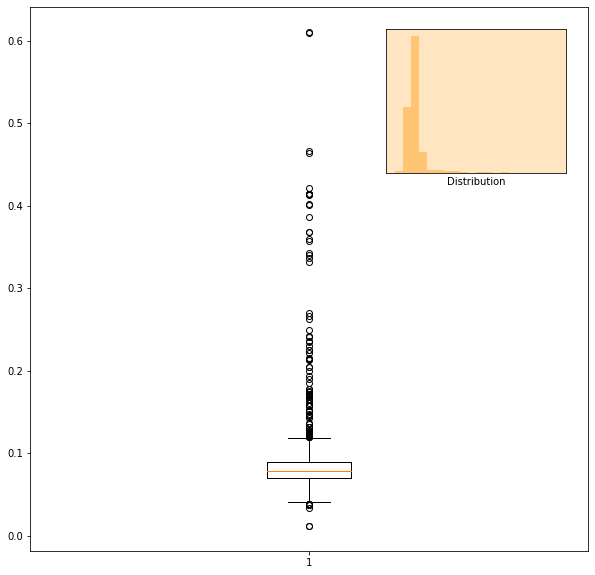

In [23]:
plt.figure(figsize=(10,10));

plt.boxplot(dfWine["chlorides"]);


ax = plt.axes([0.62,0.65,0.25,0.2],facecolor='#ffe5c1');

ax.hist(dfWine["chlorides"],bins = 20, color  ="#FFC575");

plt.xticks([]);
plt.yticks([]);

plt.xlabel('Distribution');

# Créer une nouvelle variable

Parfois, avoir accès à la valeur exacte d'une variable n'est pas le plus adapté. Il est alors possible de discrétiser la variable d'intéret.

Concernant le taux de chlore, la visualisation nous laisse suspecter une distribution qui ne suit pas une loi normale. Nous nous intéresserons donc à la valeur médiane comme seuil de discrétisation.

> Consigne : 
> * Calculer la médiane du taux de chlore.
> * Dans une nouvelle df **```dfWine2```**, créer une nouvelle variable discrète ```'high_cl'``` qui devra donc être **"yes"** si le niveau de chlore est supérieur à la médiane, et **"no"** sinon.
> * Afficher les 10 premières lignes de la nouvelle ```dfWine2```.

In [24]:
median = dfWine["chlorides"].median()

dfWine2 = dfWine.copy()

dfWine2["high_cl"] = dfWine2["chlorides"].apply(lambda x : "yes" if x >median else "no" )

dfWine2.head(10)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  ...    pH  sulphates  alcohol  quality  high_cl
0            7.4              0.70         0.00             1.9      0.076  ...  3.51       0.56      9.4        5       no
1            7.8              0.88         0.00             2.6      0.098  ...  3.20       0.68      9.8        5      yes
2            7.8              0.76         0.04             2.3      0.092  ...  3.26       0.65      9.8        5      yes
3           11.2              0.28         0.56             1.9      0.075  ...  3.16       0.58      9.8        6       no
4            7.4              0.70         0.00             1.9      0.076  ...  3.51       0.56      9.4        5       no
5            7.4              0.66         0.00             1.8      0.075  ...  3.51       0.56      9.4        5       no
6            7.9              0.60         0.06             1.6      0.069  ...  3.30       0.46      9.4        5       no
7            7.3              0.65         0.00             1.2      0.065  ...  3.39       0.47     10.0        7       no
8            7.8              0.58         0.02             2.0      0.073  ...  3.36       0.57      9.5        7       no
9            7.5              0.50         0.36             6.1      0.071  ...  3.35       0.80     10.5        5       no

[10 rows x 13 columns]

# Violin plot

Les violon plot peuvent aussi être utilisés pour visualiser une distribution.

> Consigne:
> * A partir de la df ```dfWine2```, En s'appuyant sur la bibliothèque **Seaborn**, et sur le paramètre ```kind="violin"``` afficher un violin plot présentant la distribution de la variable **density** en fonction de la **qualité du vin**.
> * Ajouter une complexité en colorant la représentation en fonction de la variable ```"high_cl"``` récemment créée.
> * Ajouter le paramètre ```split=True```, constater la différence.
> * Ajouter également le paramètre ```height=8``` pour augmenter la taille du graph.

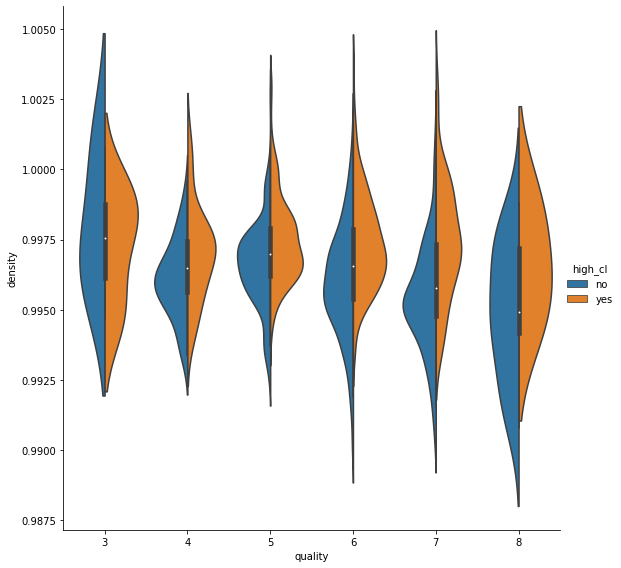

In [25]:
sns.catplot(data = dfWine2, x = "quality",y = "density", hue = "high_cl", kind = "violin", split=True,height=8);

# <font color='orange'>Fin partie</font>

# Redémarrer avec une dfWine orignale

> Consigne:
> * Importer à nouveau le fichier 'winequality_red2_EDA_CNAM.csv'.

In [26]:
dfWine = pd.read_csv("winequality_red2_EDA_CNAM.csv", sep = ",", header = 0)

# Exploration des relations entre les variables

Pour visualiser dans un même graphique, les nuages de points entre chaque chaque paire de variables qualitatives présente dans un dataset, ainsi que la distribution propre de chaque variable en diagonale, l'appel à la fonction ```.pairplot()``` de Seaborn peut-être très utile.

Ces corrélations entre variables peuvent être cruciales pour la suite de l'exploitation des données. En effet, si l'on souhaite prolonger l'analyse et s'orienter vers des étapes de modélisations, il peut alors être nécessaire de chercher d'éventuelles corrélations ou colinéarités. Par exemple, un modèle GLM ne peut pas être trouvé si au moins deux variables sont colinéaires.

> Consigne:
> * Seul le principe compte ici, donc pour accélérer le temps de calcul, réalisons l'exercice avec 4 variables seulement. --> créer une df nommée ```dfWine_short``` ne contenant que les **4 dernières colonnes** de ```dfWine```.
> * créer une représentation visuelle en nuage de point entre chaque paire de variables de la df ```dfWine_short```.
> * La diagonale devra représenter une estimation de la densité... ```'diag_kind='```..?

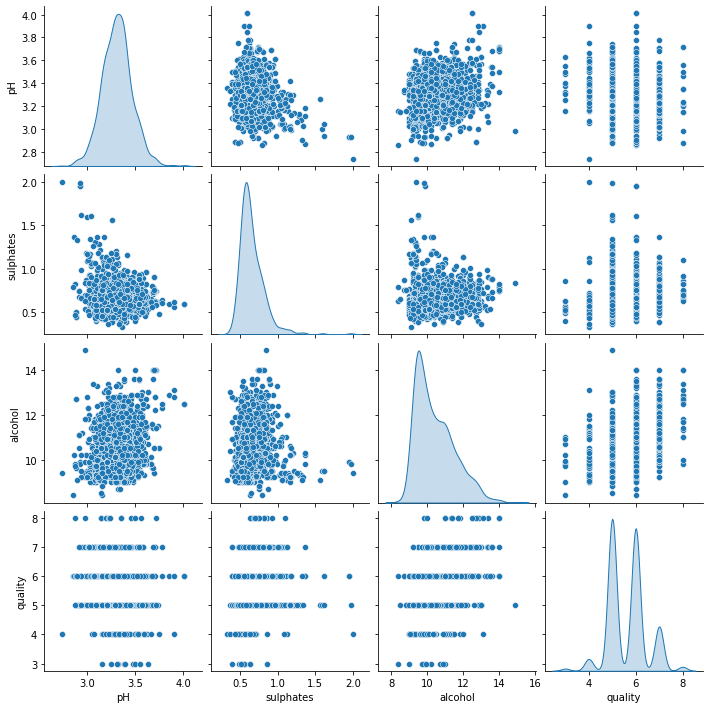

In [27]:
dfWine_short = dfWine.iloc[:,-4:]
sns.pairplot(data = dfWine_short, diag_kind = "kde");

# Corrélation par type

Cette table de corrélation visuelle peut même être créée automatiquement en ségmentant directment à l'aide d'une variable catégorielle.

> Consignes:
> * Créer à nouveau ```dfWine_short``` en incluant cette fois les **5 dernières colonnes** de ```dfWine```.
> * Créer un ```.pairplot()``` sur les variables de dfWine_short en **EXCLUANT** la dernière colone.
> * Ajouter une complexité en colorant les graphs par rapport à la qualité du vin (dernière colonne).

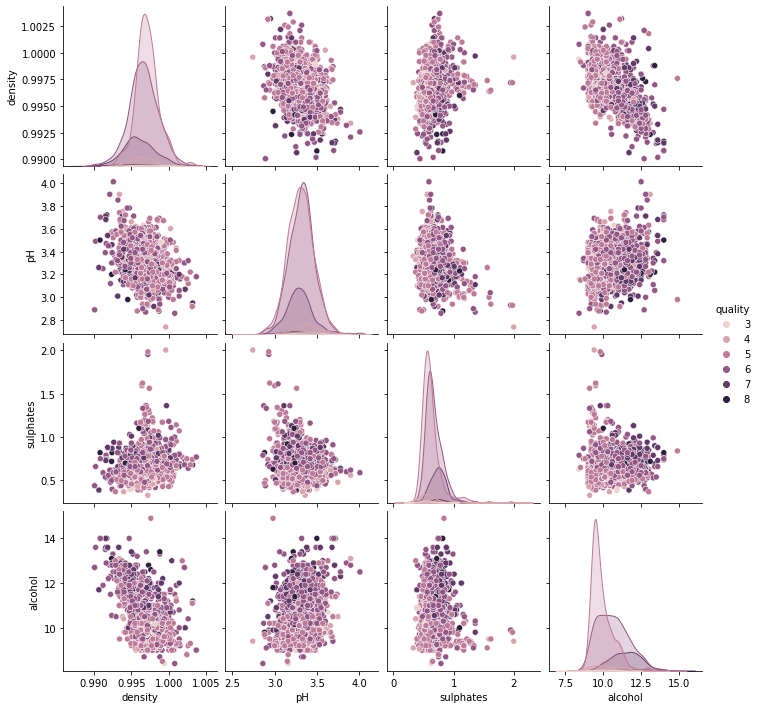

In [28]:
dfWine_short = dfWine.iloc[:,-5:]

sns.pairplot(data = dfWine_short, diag_kind = "kde", vars=dfWine_short.columns[:-1], hue= "quality");

# Heatmap !

Après avoir visualisé d'évenutelles corrélations... vient le moment de les mesurer !

Un bon moyen de mesurer les relations entre chaque paire de variables qualitatives peut-être de visualiser une heat map de la matrice de corrélation. Une heat map permettra de repérer visuellement, à l'aide d'un dégradé de couleurs, les variables les plus corrélés.

La matrice de corrélation s'obtient facilement à partir d'un data frame, grâce à la méthode ```.corr()```.
Une fois cette matrice obtenue, il suffit ensuite de la donner en argument à la fonction heatmap de Seaborn. Pour ajouter les valeurs sur la heat map, on ajoute l'argument ```annot = True```.

> Consignes :
> * Créer une matrice de corrélation nommée ```correlation``` à partir de ```dfWine```.
> * Afficher la heat map des corrélations de toutes les variables qualitatives de ```dfWine```.
> * Utiliser une colormap **cmap** de votre choix : https://seaborn.pydata.org/tutorial/color_palettes.html

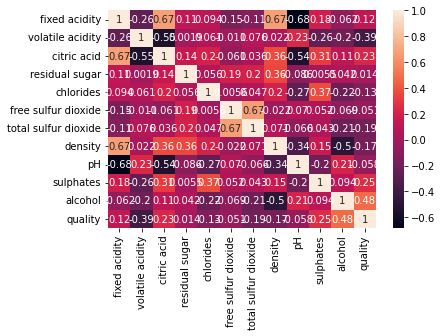

In [29]:
corr = dfWine.corr()

sns.heatmap(data=corr, annot=True, cmap=sns.color_palette("rocket", as_cmap=True));

# Une autre manière de mesurer...

Il est aussi possible de mesurer la corrélation avec la mesure V Cramer.

Le V de Cramer : contrairement au χ², il reste stable si l’on augmente la taille de l’échantillon dans les mêmes proportions inter-modalités. Il est basé sur le χ² maximal que le tableau de contingence pourrait théoriquement produire : ce dernier aurait alors une seule case non nulle par ligne ou par colonne (selon que le tableau a plus de lignes ou plus de colonnes). Ce χ² max théorique est égal à l’effectif multiplié par le plus petit côté du tableau (nombre de lignes ou de colonnes)  moins 1. Par exemple un tableau de 2 × 3 avec un effectif de 100 a pour χ² max 100 × (2 – 1) = 100.

* Le score V de Cramer pour décrire la force d'une association entre 2 variables :
    * 0.5 - 1.0  --> forte association
    * 0.3 - 0.5  --> association modérée
    * 0.1 - 0.3  --> Faible association
    * 0.0 - 0.1  --> association très faible ou inexistante



> Consignes: 
> * Définir une fonction nommée ```VCramer``` qui prend 2 arguments (```vec1```, ```vec2```) et qui : 
>     * Créée le tableau des contingences nommé ```data``` ==> comptage des modalités croisées (modalités = deux variables en particulier = ```vec1```, ```vec2```).
>     * A l'aide du package ```stats``` de la bibliotèque ```scipy.stats``` (qu'il faut importer), calculer le X2 (variable nommée ```X2```) par le biais de la fonction ```.chi2_contingency()``` sur la nouvelle variable ```data```. le score **X2** correspond à la première valeur.
>     * calculer ```n``` : longueur de ```vec1```.
>     * calculer ```minDim``` : correspond à la dimension minimale du tableau de contingence ```data``` - 1.
>     * calculer ```V``` : correspond à la racine carrée de ```(X2/n)/minDim```.
>     * La fonction doit retourner le score V de Cramer (variable: ```V```).
>
>
> * Créer une variable ```lVars``` contenant le nom des colonnes de la df ```dfWine```.
> * créer un dictionnaire vide nommé ```dictCramer```.
> * créer une variable ```idx``` et l'instancier à 0.
> * Dans une boucle ```for``` imbriquée dans une seconde boucle ```for```, qui pour chaque couple de variables possible de lVars, va créer un dictionnaire comprenant le nom de la variable 1, de la variable 2, et le score V de Cramer:
>     * créer un dictionnaire nommé ```tmpCramer``` comprenant les clés ```"var1"``` et ```"var2"``` correspondant respectivements aux variables ```crit1``` et ```crit2``` (issues de la boucle for)
>     * Dans le dictionnaire ```tmpCramer```, ajouter la clé ```VCramer``` qui aura pour valeur le score V de cramer à l'aide de la fonction ```VCramer``` créé précédemment. Elle devra prendre en arguments une Serie issue de la ```dfWine``` qui correspondra donc aux couples de variables issues des boucles ```for``` (donc ```crit1``` et ```crit2```).
>     * Copier à l'aide de la fonction ```.copy()```, le dictionnaire ```tmpCramer``` dans le dictionnaire ```dictCramer``` à l'index ```[idx]```.
>     * Incrémenter la variable ```idx``` de 1.
>
>
> * A partir de ```dictCramer```, créer une dataframe nommée ```dfCramer``` à l'aide de la fonction ```pd.DataFrame.from_dict()```. N'oubliez pas l'argument ```orient =``` pour créer à partir des indexs.
> * Afficher les premières lignes de ```dfCramer```.

In [30]:
import scipy.stats as stats

def VCramer(vec1, vec2) :
    data = pd.crosstab(vec1,vec2)
    
    X2 = stats.chi2_contingency(data)[0]
    
    n = len(vec1)
    
    minDim = min(data.shape) -1
    
    V = (X2/n)/minDim
    
    return(V)

lVars = dfWine.columns

dictCramer = dict()

idx = 0

for crit1 in lVars :
    for crit2 in lVars :
        tmpCramer = {"var1" : crit1, "var2" : crit2}
        
        tmpCramer["VCramer"] = VCramer(dfWine[crit1], dfWine[crit2])
        dictCramer[idx] = tmpCramer.copy()
        
        idx = idx+1
        
dfCramer = pd.DataFrame.from_dict(dictCramer, orient="index")

dfCramer.head()

var1              var2   VCramer
0  fixed acidity     fixed acidity  1.000000
1  fixed acidity  volatile acidity  0.105859
2  fixed acidity       citric acid  0.128160
3  fixed acidity    residual sugar  0.093810
4  fixed acidity         chlorides  0.120410

# Créons à nouveau la heatmap

Maintenant que nous avons une table comprenant le score V de Cramer, nous allons l'imputer à une heatmap.

> Consignes:
> * A partir de la df ```dfCramer``` Créer une heatmap. Il faudra préciser par le biais de la fonction ```.pivot()``` les données appropriées.
> * Ajouter les paramètres ```vmin``` et ```vmax``` pour représenter l'échelle de couleur entre 0 et 1.
> * Utiliser l'échelle de couleur **"GnBu"**.
> * Faire apparaitre le score V de Cramer dans les cases
>
>
> Que pouvez vous conclure ?

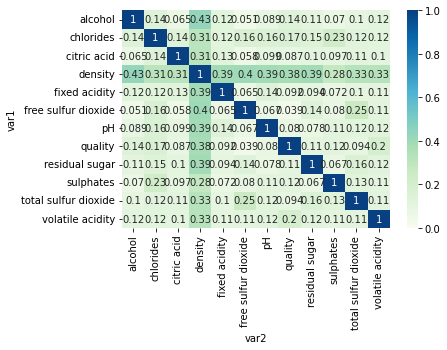

In [31]:
sns.heatmap(data=dfCramer.pivot(index = "var1", columns="var2",values="VCramer"), vmax=1, vmin=0, cmap="GnBu", annot=True);

Ici, Nous pouvons constater que dans sa forme actuelle, selon le score V de Cramer, les variables semblent globalement assez corrélées les unes aux autres.

En effet, l'absence "totale" de corrélation qui correspondrait à un score inférieur à 0.1 n'est quasiment pas observé. Ainsi, il serait, sous cette forme plutot déconseiller d'aller plus loin dans les étapes de modélisation, en tout cas basé sur le développement d'un GLM.

Qu'est-il alors possible de faire ?
Dans l'état actuel des choses, deux possibilités peuvent être envisagées :
* On peut considérer que les variables dont nous disposons sont "continues" et présentent donc un grand nombre de modalités possibles. Il serait donc envisageable de catégoriser ces variables afin de diminuer le nombre de modalités possibles.
* Il est aussi possible d'abandonner l'idée de développer un GLM en premier lieu, et se tourner vers des algorithmes différents (SVM, Random Forest...)

# <font color='orange'>Fin partie</font>

# Bokeh pour la data viz

Bokeh est une bibliothèque de visualisation interactive qui cible les navigateurs Web modernes. Son but est de fournir une construction élégante et concise de graphiques polyvalents. Bokeh peut aider toute personne souhaitant créer rapidement et facilement des graphiques, des tableaux de bord et des applications de données interactifs. Vous trouverez ici une galerie de figures produites avec Bokeh.

Il existe de nombreux avantages à travailler avec Bokeh, les principaux étant :
* Visualisation interactive dans les navigateurs modernes
* Documents HTML autonomes ou applications avec serveur
* Graphiques expressifs et polyvalents
* Gestion de données volumineuses, dynamiques ou en continu (streaming)
* Utilisation facile en python (ou Scala, R,...)
* Par ailleurs, Bokeh est une bibliothèque très riche, nous n'illustrerons que deux exemple. pour aller plus loin il faudra faire des recherches !

>Consignes:
>* Commençons tout de suite avec l'imports des fonctionnalités qui nous intéresseront.
>    * Depuis la bibliothèque ```bokeh.plotting``` importer ```figure```
>    * Depuis la bibliothèque ```bokeh.io``` importer ```show``` et ```output_notebook```
>    * Depuis la bibliothèque ```bokeh.models.widgets``` importer ```Panel``` et ```Tabs```
>    * Depuis la bibliothèque ```bokeh.models``` importer ```ColumnDataSource```
>    * Depuis la bibliothèque ```bokeh.models.tools``` importer ```HoverTool```
>    * Depuis la bibliothèque ```bokeh.transform``` importer ```factor_cmap```
>    * envoyer la commande ```output_notebook()``` pour un affichage "en ligne"

In [32]:
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from bokeh.models.widgets import Panel, Tabs
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
from bokeh.transform import factor_cmap

output_notebook()

transactions.Store_type.unique()

Loading BokehJS ...

array(['e-Shop', 'TeleShop', 'MBR', 'Flagship store'], dtype=object)

# Commençons par approter quelques modifications à notre dataframe

Afin de travailler avec la librairie bokeh, nous allons réaliser des modifications:
* Attribuer une couleur à chaque type de magasin
* Attribuer une couleur à chaque type de catégorie de produit

Pour notre exemple, nous allons aussi produire de nouvelles données (aléatoires). Ces données seront ensuites modifiées en fonction de la catégorie de produit ou du type de magasin.

> Consignes:
> * Définir des fnctions :
>     * Définir une fonction ```color_()``` qui affecte les couleurs suivantes selon type de magasin : ```'darkorchid'```,```'darkorange'```,```'green'``` et```'maroon'```. Les couleurs sont dans le même ordre que les types de magasins.
>     * Définir une fonction ```color_2()``` qui affecte les couleurs suivantes selon le code de catégorie de produit : ```'darkorchid'```,```'yellow'```,```'darkorange'```,```'green'```,```'lightcyan'```,```'maroon'```. Les couleurs sont dans le même ordre que les catégories de produis.
>
>
>
> * Supprimer de la dataframe ```transactions``` toutes les lignes pour lesquelles la **somme totale** commandée est inférieure à 0.
>
>
>
> * Ajouter une colonne ```transactions['color_by_store']``` qui contient les couleurs de chaque type de magasin.
> * Ajouter une colonne ```transactions['color_by_prod']``` qui contient les couleurs de chaque catégorie de produits.
>
>
>
> * Créer une liste vide nommée ```list_nb```.
> * Par le biais d'une **boucle for**, ajouter à la liste ```list_nb``` des valeurs aléatoires comprises entre 0 et 10 000. La ```list_nb``` doit contenir autant de valeurs qu'il y a de lignes dans la dataframe ```transactions```.
> * Créer une colonne dans la dataframe ```transactions``` nommée ```randnb``` qui contient les valeurs de ```list_nb```.
>
>
>
> * Modifier la colonne ```transactions['randnb']```:
>     * Lorsque la **catégorie de produit** est : **1** --> Multiplier la valeur de ```randnb``` par 2
>     * Lorsque la **catégorie de produit** est : **2** --> Diviser la valeur de ```randnb``` par 2
>     * Lorsque la **catégorie de produit** est : **3** --> Ajouter 100 à la valeur de ```randnb```
>     * Lorsque la **catégorie de produit** est : **4** --> Ajouter 2000 à la valeur de ```randnb```
>     * Lorsque la **catégorie de produit** est : **5** --> Diviser la valeur de ```randnb``` par 4
>     * Lorsque la **catégorie de produit** est : **5** --> Multipler la valeur de ```randnb``` par 6
>     * Lorsque le **type de magasin** est : **'e-Shop'** --> Multiplier la valeur de ```randnb``` par la racine carrée de 7934
>     * Lorsque le **type de magasin** est : **'Flagship store'** --> Diviser la valeur de ```randnb``` par la racine carrée de 7934
>     * Lorsque le **type de magasin** est : **'TeleShop'** --> Multiplier la valeur de ```randnb``` par un nombre aléatoire compris entre 0 et 500.
>
>
> * Afficher les 5 premières lignes de transactions.

In [33]:
def color_() :
    col_dict = dict()
    cat = transactions["Store_type"].unique()
    new_cat = ['darkorchid','darkorange','green','maroon']
    
    for i in range(0,len(cat)) :
        col_dict[cat[i]] = new_cat[i]
    
    return(transactions["Store_type"].apply(lambda x: col_dict[x]))
    
def color_2() :
    col_dict = dict()
    cat = transactions["prod_cat_code"].unique()
    new_cat = ['darkorchid','yellow','darkorange','green','lightcyan','maroon']
    
    for i in range(0,len(cat)) :
        col_dict[cat[i]] = new_cat[i]
    
    return(transactions["prod_cat_code"].apply(lambda x: col_dict[x]))


transactions = transactions[transactions["total_amt"] > 0]
    
transactions["color_by_store"] = color_()

transactions["color_by_prod"] = color_2()

import random
list_nb = list()
for i in range(0,transactions.shape[0]):
    n = random.randint(1,10000)
    list_nb.append(n)

transactions["randnb"] = list_nb

def rand_manip(x) :
    
    a = x[0] # prod_cat_code
    b = x[1] # store_type
    res = x[2] # rndnb
    
    if a == 1 :
        res = res * 2 
    elif a == 2 :
        res = res / 2
    elif a == 3 :
        res = res + 100
    elif a == 4 :
        res = res + 2000
    elif a == 5 :
        res = res / 4
    else :
        res = a * 6
    
    if b == "e-Shop" :
        res = res * 7934**0.5
    elif b == "Flagship store":
        res = res / 7934**0.5
    elif b == "TeleShop" :
        res = res * random.randint(1,500)
    
    return(res)

transactions["randnb"] = transactions[["prod_cat_code","Store_type","randnb"]].apply(rand_manip, axis = 1)

transactions.head(5)


cust_id   tran_date  prod_subcat_code  ...  color_by_store  color_by_prod         randnb
transaction_id                                         ...                                              
29258453508      270384  20-02-2014                 5  ...      darkorchid     darkorchid  813949.108419
25455265351      267750  20-02-2014                12  ...      darkorchid         yellow    3206.628136
1571002198       275023  20-02-2014                 6  ...      darkorchid     darkorange  207629.171780
36554696014      269345  20-02-2014                 3  ...      darkorchid     darkorange  173870.503352
56814940239      268799  20-02-2014                 7  ...      darkorchid     darkorange  184136.167036

[5 rows x 12 columns]

# Premier bar plot interactif

Un avantage majeur de la bibliothèque **bokeh** est la possibilité de créer des graphs interactifs.
La gymnastique de création est cependant un peu différente des autres biliothèque. Nous allons voir un exemple pas à pas.

Les méthodes comme ```.vbar()``` permettent de générer un type de graphique particulier. Ils font appel à des méthodes "glyph" car elles instancient des objets de la classe Glyph de bokeh. Ces objets de type Glyph contiennent les attributs tels que la couleur, la forme ou les coordonnées des points, le type de graphique, etc., qui permettent à l'utilisateur de personnaliser un graphique.

Chaque méthode glyph d'une figure Bokeh dispose d'un paramètre source. Ce paramètre prend en argument un objet de type ColumnDataSource à l'intérieur duquel des données sont stockées. Les objets ColumnDataSource permettent de transférer les données de Python vers la bibliothèque du navigateur BokehJS, et sont utilisées par de nombreuses fonctions.

La classe **```ColumnDataSource()```** représente un ensemble de noms de colonnes (chaînes de caractères) associés à des séquences de valeurs de la même manière qu'un pandas.DataFrame. Les valeurs peuvent être des listes, des tableaux NumPy ou des pandas.Series. Pour créer un objet de type ColumnDataSource on peut fournir en argument un dictionnaire ou un pandas.DataFrame. La seule contrainte sur les colonnes est qu'elles doivent être de la même taille.

L'interêt majeur d'utiliser une base données ColumnDataSource est que l'instanciation de graphiques se fait simplement en passant les clés du ColumnDataSource en argument des paramètres usuels.

La méthode **```factor_cmap()```** permet de définir les conditions de couleurs. Pour comprendre son fonctionnement, n'hésitez pas à consulter la documentation (https://docs.bokeh.org/en/latest/docs/reference/transform.html).

La classe **```HoverTool()```** permet d'afficher des informations supplémentaires dans une fenêtre contextuelle lorsque l'utilisateur survole avec le curseur un graphique issu d'une méthode glyph. Cet objet doit s'instancier avec un paramètre tooltips qui représente une liste de tuples. Chaque tuple de la liste tooltips sert à définir une information qui s'affichera dans la fenêtre contextuelle lorsque l'on survolera le dessin. Le premier élément d'un tuple de la liste est une chaîne de caractères correspondant au nom de l'information à afficher, le second élément est lui aussi une chaîne de caractères correspondant à l'adresse de l'information à afficher.

> Consignes:
> * Créer une df nommée ```count_type``` qui compte le nombre de transactions réalisées dans chacun des types de magasins. Remettez l'index à 0. Renommez également la colonne qui correspond au comptage par le nom count.
> * Créer un objet nommé ```source```. Cet objet est de type ```ColumnDataSource()``` et contient les données de la df ```count_type```.
>
>
> * Créer un objet nommé ```Type_cmap```. Cet objet est de type ```factor_cmap()```. Indiquer le nom de la colonne d'intérêt ```Store_type```. Les couleurs choisies sont les couleurs uniques de la colonne ```color_by_store``` pour chaque valeurs uniques de ```Store_type```.
>
>
> * Créer un objet nommé ```p```. Cet objet est de type ```Figure()```. Indiquer la largeur de 500 et la hauteur de 450 (dimensions souhaitées de la figure). L'axe x sera étendu selon les valeurs contenues dans ```count_type['Store_type']```. Ajouter un titre : **nombre de transactions par type de magasins**.
>    > * A partir de l'objet ```p``` précédemment créé, appliquer la méthode ```.vbar()```. Indiquer les variables x et y, afin d'afficher le graph souhaité (*cf.* titre du graphique). Préciser la source des données (correspond à l'objet ```ColumnDataSource()``` précédemment créé). Préciser la couleur de la ligne et le remplissage des barres (correspond à l'objet ```factor_cmap()``` précédemment créé). Préciser que la boite interactive au survol aura un contour noir.
>    > * A partir de l'objet ```p``` précédemment créé, appliquer la méthode ```.add_tools()``` afin d'ajouter un élément interactif à notre graphique. Nous souhaitons ajouter un **HoverTool** qui indiquera le **nombre de valeurs** (le ```count```). N'hésitez pas consulter la documentation : https://docs.bokeh.org/en/latest/docs/user_guide/tools.html.
>    > * A partir de l'objet ```p``` précédemment créé, préciser que la légende sera localisée en haut à gauche.
>
>
> * Utiliser la méthode ```show()``` afin d'afficher l'objet ```p``` que nous avons créé et modifié pour correspondre à nos attentes.

In [54]:
count_type = transactions.groupby(by = "Store_type").count() # Group By

count_type["Store_type"] = count_type.index # Index comme colonne

count_type["count"] = count_type["cust_id"] # Ajout de la colonne

count_type = count_type[["Store_type","count"]] # Sélection du subplot

count_type.index = range(len(count_type.index)) # Changement de l'index

source = ColumnDataSource(count_type)

colors = transactions[["Store_type","color_by_store"]].groupby(by = "Store_type").max().reset_index()

Type_cmap = factor_cmap("Store_type", palette = colors["color_by_store"], factors = colors["Store_type"])

p = figure(title = "nombre de transactions par type de magasins", height = 500, width = 450, x_range = count_type["Store_type"])

p.vbar(x = "Store_type", top = "count", source = source, fill_color = Type_cmap, line_color = Type_cmap, 
       hover_line_color = "black", legend_field = "Store_type")

p.add_tools(HoverTool(tooltips=[("count", "@count")]))

p.legend.location = "top_left"

show(p)


# <font color='orange'>Fin partie</font>

# Distribution de la Variable randnb par rapport à la somme totale commandée

> Consignes:
> * A l'aide des méthodes vues depuis le début, tracer un nuage de point récapitulant la variable aléatoire en fonction du montant total des commandes.
> * Colorez les points en fonction du type de magasin.
> 
>
> * Que remarquez vous ?

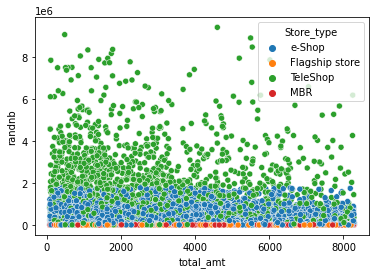

In [35]:
sns.scatterplot(data = transactions, x = "total_amt", y = "randnb", hue = "Store_type");

Il est effectivement difficile de visualiser les données.

> Consignes:
> * Reproduisez le graphique précedent.
> * Ajuster l'axe des ordonnées pour qu'il ait une échelle logarithmique.

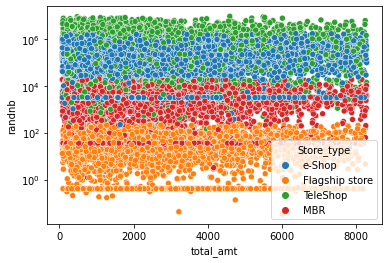

In [56]:
sns.scatterplot(data = transactions, x = "total_amt", y = "randnb", hue = "Store_type");

plt.yscale("log")

# Uilisons la bibliohèque bokeh

Nous souhaitons afficher un graphique qui représente la somme totale des commandes en fonction de la variable random number. Nous souhaitons également que les points soient colorés en fonction du code de la catégorie de produit.


> Consignes:
> * Créer un objet nommé ```source```. Cet objet est de type ```ColumnDataSource()``` et contient les données de la df ```transactions```.
>
>
> * Créer un objet nommé ```hover```. Cet objet est de type ```HoverTool()``` et doit permettre d'afficher les valeurs de ```prod_cat_code```, ```prod_subcat_code```, ```Tax``` et ```total_amt```.
>
>
> * Définir une fonction nommée ```make_fig``` qui prend en arguments les variables (```source```, ```xcol_name```, ```ycol_name```, ```colorcol_name```, ```title```) et qui :
>    > * Créer un objet nommé ```p_fig```. Cet objet est de type ```figure()```. Indiquer la largeur de 600 et la hauteur de 600. Les axes x et y auront respectivement pour légende **'Total Amount'** et **'Random Number'**.
>    > * A partir de l'objet ```p_fig``` précédemment créé, appliquer la méthode ```.circle()```. Indiquer les variables x et y, afin d'afficher le graph souhaité : correspond aux arguments ```xcol_name```, ```ycol_name```. Préciser la source des données (correspond à la ```source``` indiquée dans les arguments de la fonction). Préciser la colonne utilisée pour les couleur des données (correspond à ```colorcol_name``` indiquée dans les arguments de la fonction). Préciser également : ```legend_field='prod_cat_code'```.
>    > * A partir de l'objet ```p_fig``` précédemment créé, appliquer la méthode ```.add_tools()``` afin d'ajouter l'élément interactif ```hover``` que vous avons précédemment créé.
>    > * A partir de l'objet ```p_fig``` précédemment créé, préciser que la légende sera localisée en haut à gauche.
>    > Créer l'objet ```tab``` qui est issu de la méthode ```.Panel()``` afin de crée un onglet à notre graphique. Il faut indiquer en paramètre ```child = ``` l'objet à afficher dans l'onglet (l'objet ```p_fig``` dans notre cas). Préciser également le titre (correspond à ```title``` indiquée dans les arguments de la fonction).
>    > * La fonction ```make_fig())``` doit retourner l'objet ```tab``` précédemment créé.
>
> * A l'aide de la fonction ```make_fig())``` créée, un objet nommé ```tab1```. La source correspond à l'objet ```source``` précédemment créé. Indiquer 'total_amt' et 'randnb' respectivement pour ```xcol_name```, ```ycol_name``` et 'color_by_prod' pour l'argument ```colorcol_name```. Le titre doit être 'Random nb as function of total amount'.
>
> * Créer un objet nommé ```tabs```. Cet objet est de type ```Tabs()```. Dans l'argument ```tabs=```, renseigner une liste contenant l'objet ```tab1``` que nous venons de créer.
> 
>
> * Utiliser la méthode ```show()``` afin d'afficher l'objet ```tabs``` que nous avons créé et modifié pour correspondre à nos attentes.

In [51]:
source = ColumnDataSource(transactions)

hover = HoverTool(tooltips=[("Catégorie", "@prod_cat_code"),("Sous-catégorie","@prod_subcat_code"),("Taxes","@Tax"),("Montant total","@total_amt")])


def make_fig(source, xcol_name, ycol_name, colorcol_name, title) :
    p_fig = figure(height = 500, width = 450, x_axis_label="Total Amount",
           y_axis_label="Random Number")
    
    p_fig.circle(0, 0, size=0.00000001, color= "#ffffff", legend_label="Catégorie de produit")
    
    p_fig.circle(source = source,x = xcol_name, y = ycol_name, fill_color = colorcol_name, line_color = colorcol_name, legend_field='prod_cat_code')
        
    p_fig.add_tools(hover)
    
    p_fig.legend.location = "top_left"
    
    tab = Panel(child = p_fig, title = title)
    
    return(tab)

tab1 = make_fig(source, "total_amt","randnb","color_by_prod","Random nb as function of total amount")

tabs = Tabs(tabs = [tab1])
    
show(tabs)

# Visualisation multi-onglets

Nous avons pu constater à l'aide de l'échelle logarithmique sur un exercice précédent que la variable random number n'a pas la même échelle en fonction du type de magasin. Cepednant, nous pouvons nous demander s'il existe une répartition particulière en fonction du code de la catégorie de produit.

Nous allons profiter de la bibliothèque Bokeh pour afficher la somme totale des commandes en fonction de la variable random number. Nous souhaitons également que les points soient colorés en fonction du code de la catégorie de produit. Nous afficherons les nuages de points spécifiques de chaque type de magasin. Chaque type de magasin sera représenté dans un onglet.

> Consignes:
> * Créer 4 objets nommés ```source1``` à ```source4```. Cet objet est de type ```ColumnDataSource()``` et contient les données de la df ```transactions```. Attention chaque objet ```source``` doit contenir uniquement des données d'un type de magasin. Nous crééons 4 objets source pouisqu'il y a 4 types de magasins.
>
>
> * Créer 1 objet nommé ```hover```. Cet objet est de type ```HoverTool()``` et doit permettre d'afficher les valeurs de ```prod_cat_code```, ```prod_subcat_code```, ```Tax``` et ```total_amt```.
>
>
> * A l'aide de la fonction ```make_fig()``` créée, 4 objets nommés ```tab1``` à ```tab4```. La source correspond à l'objet ```source``` précédemment créé. Indiquer 'total_amt' et 'randnb' respectivement pour ```xcol_name```, ```ycol_name``` et 'color_by_prod' pour l'argument ```colorcol_name```. Le titre doit être adapté pour chaque objet ```tab```, et correspond à chaque type de magasin.
>
>
> * Créer un objet nommé ```tabs```. Cet objet est de type ```Tabs()```. Dans l'argument ```tabs=```, renseigner une liste contenant les objets ```tab1``` à ```tab4``` que nous venons de créer.
> 
>
> * Utiliser la méthode ```show()``` afin d'afficher l'objet ```tabs``` que nous avons créé et modifié pour correspondre à nos attentes.

In [60]:
stores = transactions["Store_type"].unique()

source1 = ColumnDataSource(transactions[transactions["Store_type"] == stores[0]])
source2 = ColumnDataSource(transactions[transactions["Store_type"] == stores[1]])
source3 = ColumnDataSource(transactions[transactions["Store_type"] == stores[2]])
source4 = ColumnDataSource(transactions[transactions["Store_type"] == stores[3]])

hover = HoverTool(tooltips=[("Catégorie", "@prod_cat_code"),("Sous-catégorie","@prod_subcat_code"),("Taxes","@Tax"),("Montant total","@total_amt")])

tab1 = make_fig(source1, "total_amt","randnb","color_by_prod",stores[0])
tab2 = make_fig(source2, "total_amt","randnb","color_by_prod",stores[1])
tab3 = make_fig(source3, "total_amt","randnb","color_by_prod",stores[2])
tab4 = make_fig(source4, "total_amt","randnb","color_by_prod",stores[3])

tabs = Tabs(tabs = [tab1,tab2,tab3,tab4])

show(tabs)